<a href="https://colab.research.google.com/github/Hamza1122/Pose_Estimation_Yolo_Points/blob/main/Untitled77.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing all required libraries
import keras
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
import sklearn.metrics as metrics



from keras.models import Model

from keras.layers import *
from keras import optimizers
from pprint import pprint



from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix 


In [2]:
df=pd.read_csv('pose.csv')  #pose dataset loading
df1=pd.read_csv('angles.csv') #angles datatset loading

In [3]:
df.head(10)    #displaying 10 rows of a dataset

,Image,Class,Neck_to_RShoulder,Neck_to_LShoulder,RShoulder_to_RElbow,RElbow_to_RWrist,LShoulder_to_LElbow,LElbow_to_LWrist,Neck_to_RHip,RHip_to_RKnee,RKnee_to_RAnkle,Neck_to_LHip,LHip_to_LKnee,LKnee_to_LAnkle,Neck_to_Nose,Nose_to_REye,REye_to_REar,Nose_to_LEye,LEye_to_LEar
0,img\Ahmed0.jpg,Ahmed,8,14,14,16,7,14,28,13,28,28,13,28,0,0,0,0,0
1,img\Ahmed1.jpg,Ahmed,0,14,14,14,7,15,28,13,28,28,27,14,0,0,0,0,0
2,img\Ahmed10.jpg,Ahmed,0,8,14,15,16,14,28,27,14,28,27,14,0,0,0,0,16
3,img\Ahmed100.jpg,Ahmed,15,15,15,14,27,16,28,28,28,27,28,28,20,15,14,14,31
4,img\Ahmed101.jpg,Ahmed,15,7,15,14,13,16,28,28,28,27,28,42,20,20,29,14,31
5,img\Ahmed102.jpg,Ahmed,15,7,15,14,13,16,28,28,28,41,15,42,20,15,14,26,28
6,img\Ahmed103.jpg,Ahmed,15,7,15,14,13,16,28,28,28,41,15,42,15,7,14,22,15
7,img\Ahmed104.jpg,Ahmed,15,7,15,14,13,29,41,28,29,41,14,42,15,7,14,0,20
8,img\Ahmed105.jpg,Ahmed,15,7,15,14,13,29,41,28,29,41,28,28,8,15,28,20,7
9,img\Ahmed106.jpg,Ahmed,15,7,15,14,28,14,41,28,29,41,28,28,8,8,16,20,7


In [4]:
df1.head(10)   #displaying distance rows

,images,angles,distance
0,img\Ahmed0.jpg,173.203364,0.658186
1,img\Ahmed1.jpg,172.653846,0.660281
2,img\Ahmed10.jpg,172.050827,0.662595
3,img\Ahmed100.jpg,168.183585,0.677831
4,img\Ahmed101.jpg,167.413389,0.680949
5,img\Ahmed102.jpg,167.661262,0.679942
6,img\Ahmed103.jpg,166.819833,0.683372
7,img\Ahmed104.jpg,166.314019,0.685450
8,img\Ahmed105.jpg,165.902660,0.687150
9,img\Ahmed106.jpg,166.015987,0.686681


In [5]:
df1.shape  #size of dataset


(1260, 3)

In [6]:
df.shape #size of dataset

(1260, 19)

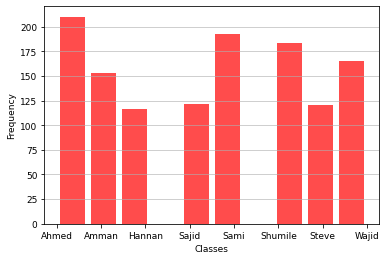

In [7]:
colors = ['red'] 
plt.figsize=(20,20)
plt.hist(df['Class'],rwidth=0.8,alpha=0.7,color = colors, label = colors)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Classes',fontsize=9)
plt.ylabel('Frequency',fontsize=9)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.ylabel('Frequency',fontsize=9)
plt.show()



In [8]:
df=pd.merge(df,df1, how='left', left_on='Image', right_on='images')   #merge both datasets and duplicates will be removed automatically

In [9]:
df.describe()   #summary of dataset

,Neck_to_RShoulder,Neck_to_LShoulder,RShoulder_to_RElbow,RElbow_to_RWrist,LShoulder_to_LElbow,LElbow_to_LWrist,Neck_to_RHip,RHip_to_RKnee,RKnee_to_RAnkle,Neck_to_LHip,LHip_to_LKnee,LKnee_to_LAnkle,Neck_to_Nose,Nose_to_REye,REye_to_REar,Nose_to_LEye,LEye_to_LEar,angles,distance
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1247.000000,1247.000000
mean,15.410317,14.673016,28.510317,24.302381,29.024603,23.010317,55.153175,37.260317,33.377778,55.976984,34.454762,32.921429,16.989683,14.260317,15.370635,14.858730,16.390476,127.287726,0.302515
std,8.180202,8.221288,16.202621,14.171025,14.516903,13.999003,25.428331,22.779682,20.294147,24.894700,16.861875,15.532876,12.395869,32.529361,30.422833,18.025859,21.709759,68.334256,6.266492
min,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,27.000000,13.000000,0.000000,27.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-91.697013,-109.242595
25%,8.000000,8.000000,15.000000,14.000000,16.000000,14.000000,41.000000,28.000000,28.000000,41.000000,28.000000,28.000000,8.000000,0.000000,7.000000,0.000000,7.000000,126.974529,0.668772
50%,15.000000,15.000000,28.000000,27.500000,28.000000,16.000000,44.000000,28.000000,28.000000,55.000000,28.000000,28.000000,15.000000,8.000000,8.000000,14.000000,8.000000,159.895089,0.688429
75%,22.000000,20.000000,42.000000,29.000000,32.000000,28.000000,70.000000,42.000000,42.000000,70.000000,42.000000,42.000000,27.000000,15.000000,16.000000,16.000000,20.000000,168.457787,0.770314
max,40.000000,41.000000,125.000000,114.000000,158.000000,115.000000,181.000000,302.000000,275.000000,167.000000,126.000000,112.000000,139.000000,508.000000,343.000000,250.000000,238.000000,173.203364,98.986385


In [10]:
df.columns

Index(['Image', 'Class', 'Neck_to_RShoulder', 'Neck_to_LShoulder',
       'RShoulder_to_RElbow', 'RElbow_to_RWrist', 'LShoulder_to_LElbow',
       'LElbow_to_LWrist', 'Neck_to_RHip', 'RHip_to_RKnee', 'RKnee_to_RAnkle',
       'Neck_to_LHip', 'LHip_to_LKnee', 'LKnee_to_LAnkle', 'Neck_to_Nose',
       'Nose_to_REye', 'REye_to_REar', 'Nose_to_LEye', 'LEye_to_LEar',
       'images', 'angles', 'distance'],
      dtype='object')

In [11]:
del df['Image']
del df['images']

In [12]:
df=df.fillna(0)

In [13]:
df['Class'].unique()

array(['Ahmed', 'Amman', 'Hannan', 'Sajid', 'Sami', 'Shumile', 'Steve',
       'Wajid'], dtype=object)

In [14]:
#df['Class']=df['Class'].replace({'Sami': '1', 'Ali': '2', 'Feroz': '3','Hamza':'4','Shumile':'5'})
#df['Class'].unique()

In [15]:
df.dtypes    #datatypes of each columns in a dataset

Class                   object
Neck_to_RShoulder        int64
Neck_to_LShoulder        int64
RShoulder_to_RElbow      int64
RElbow_to_RWrist         int64
LShoulder_to_LElbow      int64
LElbow_to_LWrist         int64
Neck_to_RHip             int64
RHip_to_RKnee            int64
RKnee_to_RAnkle          int64
Neck_to_LHip             int64
LHip_to_LKnee            int64
LKnee_to_LAnkle          int64
Neck_to_Nose             int64
Nose_to_REye             int64
REye_to_REar             int64
Nose_to_LEye             int64
LEye_to_LEar             int64
angles                 float64
distance               float64
dtype: object

In [16]:
df.isnull().sum()    #to check any null values in a dataset

Class                  0
Neck_to_RShoulder      0
Neck_to_LShoulder      0
RShoulder_to_RElbow    0
RElbow_to_RWrist       0
LShoulder_to_LElbow    0
LElbow_to_LWrist       0
Neck_to_RHip           0
RHip_to_RKnee          0
RKnee_to_RAnkle        0
Neck_to_LHip           0
LHip_to_LKnee          0
LKnee_to_LAnkle        0
Neck_to_Nose           0
Nose_to_REye           0
REye_to_REar           0
Nose_to_LEye           0
LEye_to_LEar           0
angles                 0
distance               0
dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import preprocessing

labelencoder_y_1 = LabelEncoder()
df['Class'] = labelencoder_y_1.fit_transform(df['Class'].values)

In [18]:
df['Class'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [19]:
Y=df['Class']
X=df.drop(['Class'],axis=1)

# x = X #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()   #normalizing the data
# X = min_max_scaler.fit_transform(x)

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.33, random_state=42)  #random state fill fix the same dataset tray

In [21]:
y_train = keras.utils.to_categorical(y_train,8)
y_val = keras.utils.to_categorical(y_val,8)

**MLP**


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 19)]              0         
_________________________________________________________________
dense (Dense)                (None, 10)                200       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 88        
Total params: 718
Trainable params: 718
Non-trainable params: 0
_________________________________________________________________
None


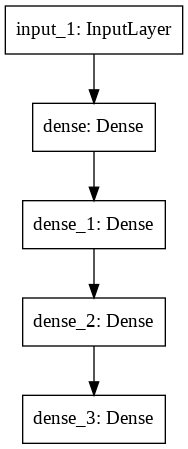

In [22]:
#Code reference
#https://www.pyimagesearch.com/2019/02/04/keras-multiple-inputs-and-mixed-data/
# Multilayer Perceptron
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
visible = Input(shape=(19,))    #19 size of the columns
hidden1 = Dense(10, activation='relu')(visible)
hidden2 = Dense(20, activation='relu')(hidden1)
hidden3 = Dense(10, activation='relu')(hidden2)
output = Dense(8, activation='softmax')(hidden3)   #5 number of classess
model = Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='multilayer_perceptron_graph.png')

In [23]:
# Compile the model 
model.compile(optimizer='rmsprop',
                       loss ='categorical_crossentropy',
                       metrics=['accuracy'])

In [24]:
history=model.fit(x=X_train, y=y_train, epochs =1000, validation_data = (X_val,y_val),batch_size=120)

Epoch 1/1000
8/8 [==============================] - 1s 68ms/step - loss: 4.7952 - accuracy: 0.1668 - val_loss: 2.6209 - val_accuracy: 0.1899
Epoch 2/1000
8/8 [==============================] - 0s 7ms/step - loss: 2.3604 - accuracy: 0.2000 - val_loss: 2.3156 - val_accuracy: 0.2139
Epoch 3/1000
8/8 [==============================] - 0s 7ms/step - loss: 2.2569 - accuracy: 0.2207 - val_loss: 2.2430 - val_accuracy: 0.2043
Epoch 4/1000
8/8 [==============================] - 0s 7ms/step - loss: 2.1066 - accuracy: 0.2100 - val_loss: 2.1655 - val_accuracy: 0.1394
Epoch 5/1000
8/8 [==============================] - 0s 8ms/step - loss: 2.0875 - accuracy: 0.1757 - val_loss: 2.1329 - val_accuracy: 0.1803
Epoch 6/1000
8/8 [==============================] - 0s 7ms/step - loss: 2.0668 - accuracy: 0.2079 - val_loss: 2.3628 - val_accuracy: 0.1442
Epoch 7/1000
8/8 [==============================] - 0s 7ms/step - loss: 2.1443 - accuracy: 0.1934 - val_loss: 2.1240 - val_accuracy: 0.1995
Epoch 8/1000
8/8 [=

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


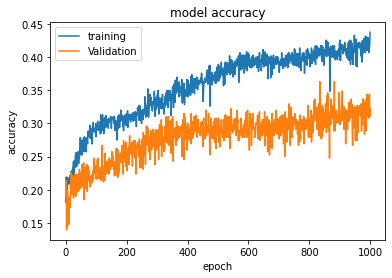

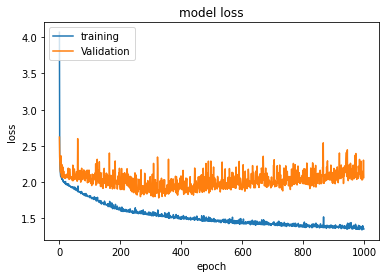

In [25]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'Validation'], loc='upper left')
plt.show()

In [26]:
ynew = model.predict(X_val)  #predicting the results on the validation dataset

In [27]:
results = np.argmax(ynew,axis = 1)

In [28]:
matrix = metrics.confusion_matrix(y_val.argmax(axis=1), ynew.argmax(axis=1))

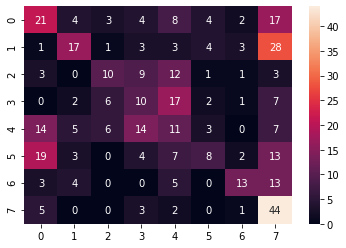

In [29]:
sns.heatmap(matrix, annot=True)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)  #random state fill fix the same dataset tray

**Support Vector Machine**

In [31]:
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC 

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
			'kernel': ['rbf']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,cv=5) 

# fitting the model for grid search 
grid.fit(X_train, y_train) 


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.178, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.178, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.172, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.172, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.173, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.178, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.178, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.172, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.172, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.173, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    8.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [32]:
# print winning set of hyperparameters
from pprint import pprint
pprint(grid.best_estimator_.get_params())

{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.001,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [33]:
grid_predictions = grid.predict(X_test) 

print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.61      0.70      0.65        63
           1       0.79      0.62      0.69        60
           2       0.78      0.64      0.70        39
           3       0.72      0.69      0.70        45
           4       0.50      0.78      0.61        60
           5       0.74      0.71      0.73        56
           6       0.89      0.63      0.74        38
           7       0.91      0.78      0.84        55

    accuracy                           0.70       416
   macro avg       0.74      0.69      0.71       416
weighted avg       0.73      0.70      0.71       416



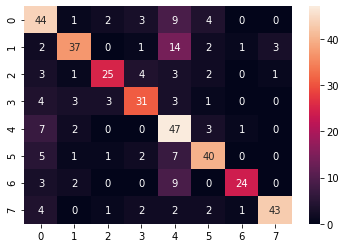

In [34]:
matrix = metrics.confusion_matrix(y_test,grid_predictions)
sns.heatmap(matrix, annot=True)

**Random Forest Classifier**

In [35]:
from sklearn.ensemble import RandomForestClassifier
model_params = {
    'n_estimators': [50, 150, 250],
    'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
    'min_samples_split': [2, 4, 6]
}


In [36]:
random_forest = RandomForestClassifier(random_state=1)

# set up grid search meta-estimator
random_forest = GridSearchCV(random_forest, model_params, cv=5,verbose=3)

# train the grid search meta-estimator to find the best model
random_forest = random_forest.fit(X_train, y_train)

# print winning set of hyperparameters
pprint(random_forest.best_estimator_.get_params())

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] max_features=sqrt, min_samples_split=2, n_estimators=50 .........
[CV]  max_features=sqrt, min_samples_split=2, n_estimators=50, score=0.817, total=   0.1s
[CV] max_features=sqrt, min_samples_split=2, n_estimators=50 .........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_features=sqrt, min_samples_split=2, n_estimators=50, score=0.840, total=   0.1s
[CV] max_features=sqrt, min_samples_split=2, n_estimators=50 .........
[CV]  max_features=sqrt, min_samples_split=2, n_estimators=50, score=0.805, total=   0.1s
[CV] max_features=sqrt, min_samples_split=2, n_estimators=50 .........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  max_features=sqrt, min_samples_split=2, n_estimators=50, score=0.817, total=   0.1s
[CV] max_features=sqrt, min_samples_split=2, n_estimators=50 .........
[CV]  max_features=sqrt, min_samples_split=2, n_estimators=50, score=0.804, total=   0.1s
[CV] max_features=sqrt, min_samples_split=2, n_estimators=150 ........
[CV]  max_features=sqrt, min_samples_split=2, n_estimators=150, score=0.822, total=   0.4s
[CV] max_features=sqrt, min_samples_split=2, n_estimators=150 ........
[CV]  max_features=sqrt, min_samples_split=2, n_estimators=150, score=0.876, total=   0.4s
[CV] max_features=sqrt, min_samples_split=2, n_estimators=150 ........
[CV]  max_features=sqrt, min_samples_split=2, n_estimators=150, score=0.811, total=   0.4s
[CV] max_features=sqrt, min_samples_split=2, n_estimators=150 ........
[CV]  max_features=sqrt, min_samples_split=2, n_estimators=150, score=0.876, total=   0.5s
[CV] max_features=sqrt, min_samples_split=2, n_estimators=150 ........
[CV]  max_features=sqrt, min_s

[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:  2.0min finished


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 250,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [37]:
predictions = random_forest.predict(X_test)
matrix = metrics.confusion_matrix(y_test, predictions)


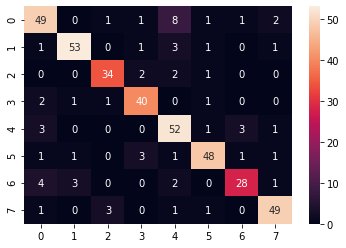

In [38]:
sns.heatmap(matrix, annot=True)

In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        63
           1       0.91      0.88      0.90        60
           2       0.87      0.87      0.87        39
           3       0.85      0.89      0.87        45
           4       0.75      0.87      0.81        60
           5       0.89      0.86      0.87        56
           6       0.85      0.74      0.79        38
           7       0.89      0.89      0.89        55

    accuracy                           0.85       416
   macro avg       0.85      0.85      0.85       416
weighted avg       0.85      0.85      0.85       416



**Decision Tree Classifier**

In [40]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

In [41]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [42]:
y_pred=clf.predict(X_test)

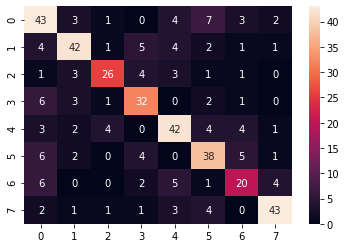

In [43]:
matrix = metrics.confusion_matrix(y_val.argmax(axis=1), y_pred)
sns.heatmap(matrix, annot=True)


In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.68      0.64        63
           1       0.75      0.70      0.72        60
           2       0.76      0.67      0.71        39
           3       0.67      0.71      0.69        45
           4       0.69      0.70      0.69        60
           5       0.64      0.68      0.66        56
           6       0.57      0.53      0.55        38
           7       0.83      0.78      0.80        55

    accuracy                           0.69       416
   macro avg       0.69      0.68      0.68       416
weighted avg       0.69      0.69      0.69       416



**Voting Classifier**

In [45]:
from sklearn.ensemble import VotingClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.datasets import load_iris 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split

In [46]:
estimator = [] 
estimator.append(('LR',  
                  LogisticRegression(solver ='lbfgs',  
                                     multi_class ='multinomial',  
                                     max_iter = 200))) 
estimator.append(('SVC', SVC(
    C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False
    
))) 
estimator.append(('DTC', DecisionTreeClassifier())) 
estimator.append(('Rd',RandomForestClassifier(bootstrap=True,
ccp_alpha=0.0,
class_weight= None,
criterion= 'gini',
max_depth= None,
max_features= 'sqrt',
max_leaf_nodes= None,
max_samples= None,
min_impurity_decrease= 0.0,
min_impurity_split= None,
min_samples_leaf= 1,
min_samples_split= 2,
min_weight_fraction_leaf= 0.0,
n_estimators= 250,
n_jobs= None,
oob_score= False,
random_state= 1,
verbose= 0,
warm_start= False)


))


In [47]:
from sklearn.metrics import accuracy_score, f1_score, log_loss
# Voting Classifier with hard voting 
voting_clf = VotingClassifier(estimators = estimator, voting ='hard') 
voting_clf.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('LR',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=200,
                                                 multi_class='multinomial',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('SVC',
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef...
                                                     criterion='gini',
                                       

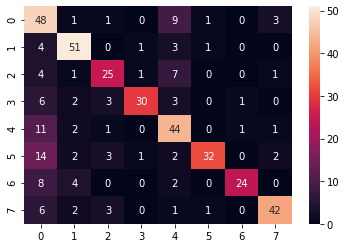

In [48]:
preds = voting_clf.predict(X_test)


matrix = metrics.confusion_matrix(y_test,preds)
sns.heatmap(matrix, annot=True)


In [49]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.48      0.76      0.59        63
           1       0.78      0.85      0.82        60
           2       0.69      0.64      0.67        39
           3       0.91      0.67      0.77        45
           4       0.62      0.73      0.67        60
           5       0.91      0.57      0.70        56
           6       0.92      0.63      0.75        38
           7       0.86      0.76      0.81        55

    accuracy                           0.71       416
   macro avg       0.77      0.70      0.72       416
weighted avg       0.76      0.71      0.72       416



In [50]:
acc = accuracy_score(y_test, preds)
print("Voting Classifier Accuracy",acc)

Voting Classifier Accuracy 0.7115384615384616


|Algorithm|Accuracy|
|---------|--------|
|Multi-Layer Perceptron|0.58|
|Random Forest|0.85|
|SVM|0.70|
|Decision Tree|0.69|
|Voting Classifier|0.71|




**Testing Data**

In [64]:
def multi_layer_perceptron(X):
  X = model.predict(X)
  plt.hist(X,rwidth=0.8,alpha=0.7)
  plt.title('Multi-Layer Perceptron')
  plt.grid(axis='y', alpha=0.75)
  plt.xlabel('Classes',fontsize=9)
  plt.show()




def random_forest_func(X):

  X = random_forest.predict(X)
  plt.hist(X,rwidth=0.8,color='sienna',alpha=0.7)
  plt.title('Random Forest')
  plt.grid(axis='y', alpha=0.75)
  plt.xlabel('Classes',fontsize=9)
   
  plt.show()
  #return accuracy_score(y,X)
  #return (np.bincount(X).argmax())

def support_vector_machine(X):
  X= grid.predict(X)
  plt.hist(X,rwidth=0.8,color='red',alpha=0.7)
  plt.title('Support Vector Machine')
  plt.grid(axis='y', alpha=0.75)
  plt.xlabel('Classes',fontsize=9)
   
  plt.show()
  
  #return (np.bincount(X).argmax())


def decision_tree(X):
   X = clf.predict(X)
   plt.hist(X,rwidth=0.8,color='orange',alpha=0.7)
   plt.title('Decision Tree')
   plt.grid(axis='y', alpha=0.75)
   plt.xlabel('Classes',fontsize=9)
   plt.show()
  
   #return (np.bincount(X).argmax())


def voting_classifier(X):
  X = voting_clf.predict(X)
  plt.hist(X,rwidth=0.8,color='navy',alpha=0.7)
  plt.title('Voting Classifier')
  plt.grid(axis='y', alpha=0.75)
  plt.xlabel('Classes',fontsize=9)
   
  plt.show()
  
  #return (np.bincount(X).argmax())

In [65]:
def read_csv(pose_file,angles_file):
 
  pose_data = pd.read_csv(pose_file)
  angles_data=pd.read_csv(angles_file)
 
  return pose_data,angles_data


def pre_processing(df):
  
  del df['Image']
  del df['images']
  
  df=df.fillna(0)
  
  return df

In [72]:

def label_encoding(df):
  
  df = pre_processing(df)
  df['Class'] = labelencoder_y_1.fit_transform(df['Class'].values)
  
  return df

def testing_data(pose_file,angles_file):
  df,df1 = read_csv(pose_file,angles_file)
  
  df=pd.merge(df,df1, how='left', left_on='Image', right_on='images')
  df = label_encoding(df)
  
  Y=df['Class']
  X=df.drop(['Class'],axis=1)
  
  return random_forest_func(X),support_vector_machine(X),decision_tree(X),voting_classifier(X)

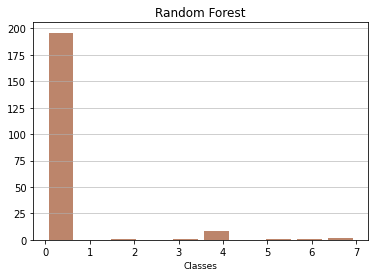

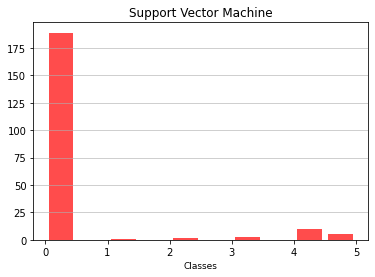

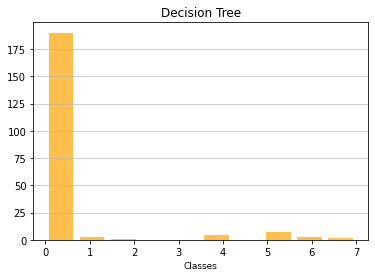

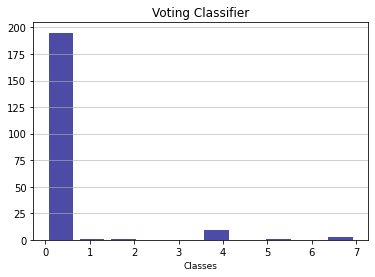

(None, None, None, None)


In [73]:
print(testing_data('ahmed_pose.csv','ahmed_angle.csv'))

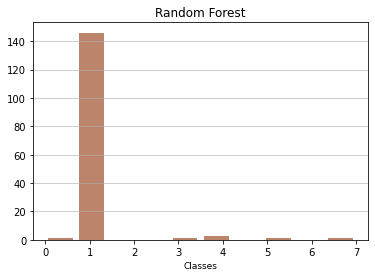

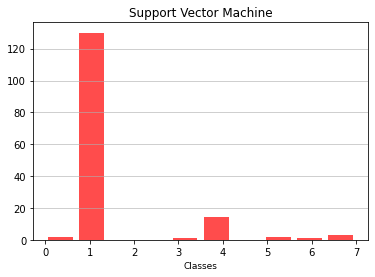

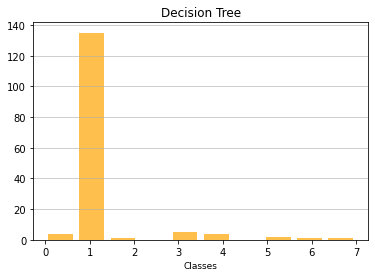

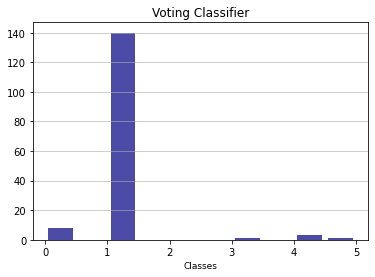

(None, None, None, None)


In [74]:
print(testing_data('amman_pose.csv','amman_angle.csv'))

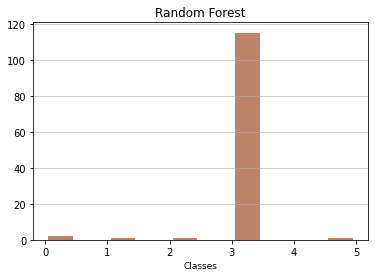

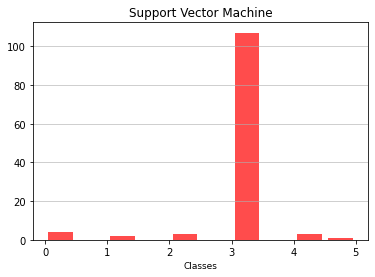

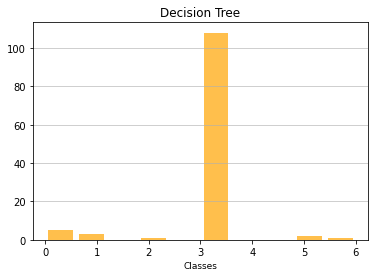

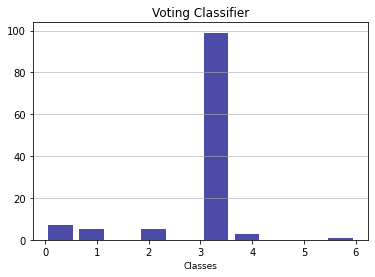

(None, None, None, None)


In [75]:
print(testing_data('sajid_pose.csv','sajid_angle.csv'))

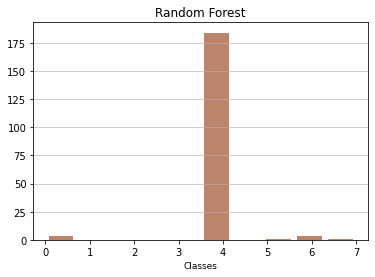

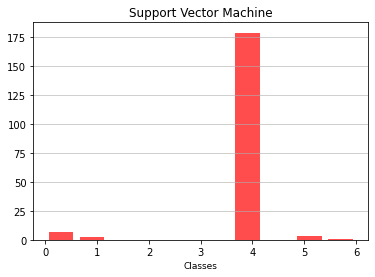

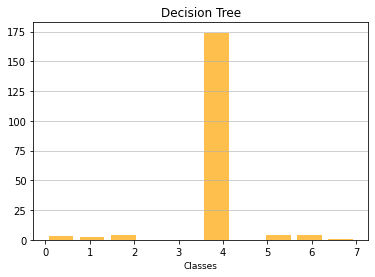

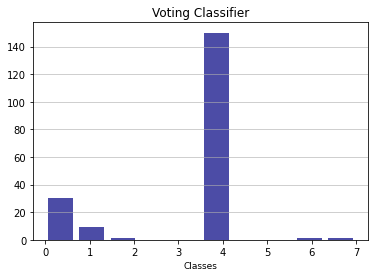

(None, None, None, None)


In [76]:
print(testing_data('sami_pose.csv','sami_angle.csv'))

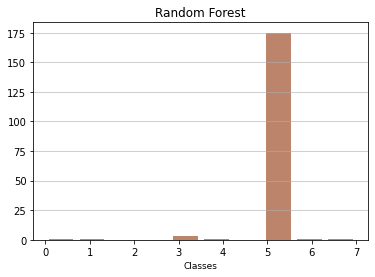

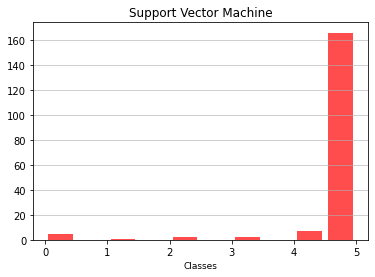

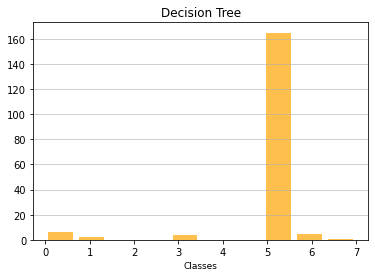

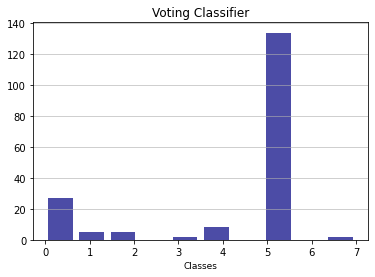

(None, None, None, None)


In [77]:
print(testing_data('shumile_pose.csv','shumail_angle.csv'))

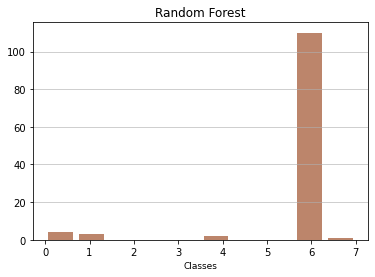

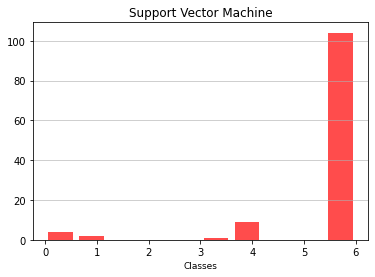

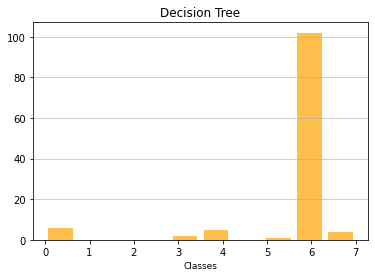

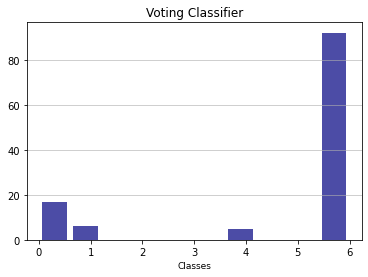

(None, None, None, None)


In [78]:
print(testing_data('steve_pose.csv','steve_angle.csv'))

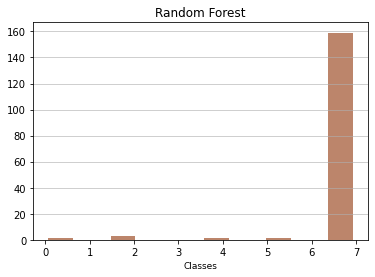

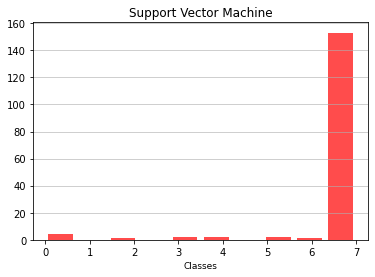

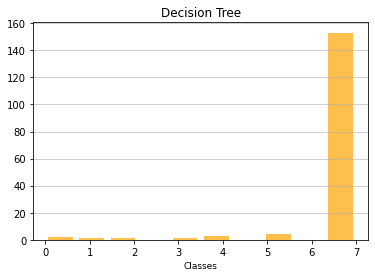

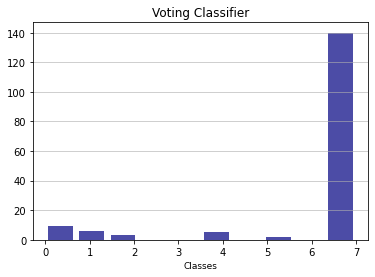

(None, None, None, None)


In [79]:
print(testing_data('wajid_pose.csv','wajid_angle.csv'))